In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("sales_data.csv")
df['Date'] = pd.to_datetime(df['Date'])


In [2]:
# Add random profit margins (10%–30%)
df['Profit'] = df['Sales'] * np.random.uniform(0.1, 0.3, len(df))
df['Month'] = df['Date'].dt.to_period('M')


In [3]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_order_value = df['Sales'].mean()
top_region = df.groupby('Region')['Sales'].sum().idxmax()
top_product = df.groupby('Product')['Sales'].sum().idxmax()

print("Total Sales:", total_sales)
print("Total Profit:", total_profit)
print("Average Order Value:", avg_order_value)
print("Top Region:", top_region)
print("Top Product:", top_product)


Total Sales: 775000
Total Profit: 165935.93333869803
Average Order Value: 51666.666666666664
Top Region: East
Top Product: Laptop


/tmp/ipython-input-3075958475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_r")


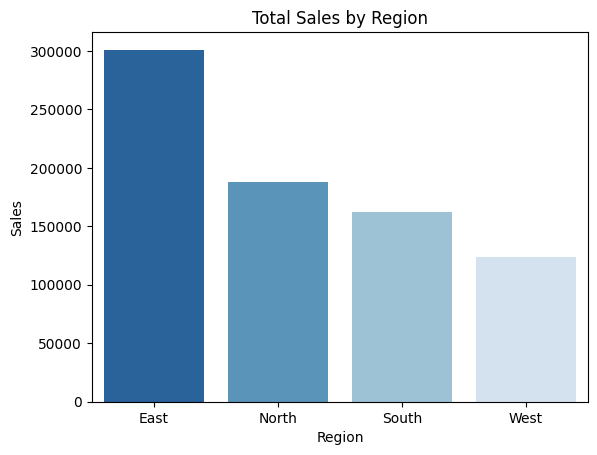

In [4]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_r")
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.show()


/tmp/ipython-input-2414378693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_profit.index, y=product_profit.values, palette="Oranges_r")


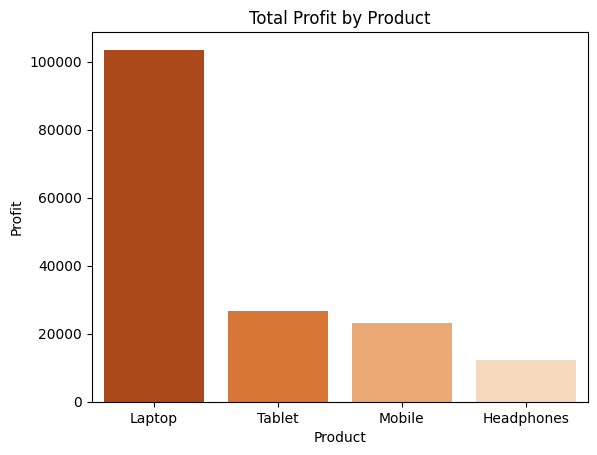

In [5]:
product_profit = df.groupby('Product')['Profit'].sum().sort_values(ascending=False)
sns.barplot(x=product_profit.index, y=product_profit.values, palette="Oranges_r")
plt.title("Total Profit by Product")
plt.ylabel("Profit")
plt.show()


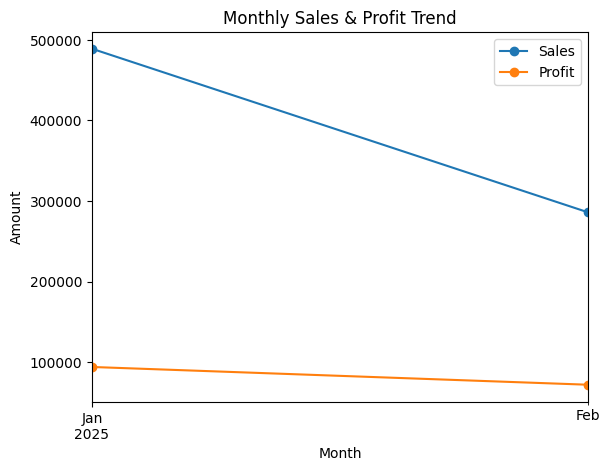

In [6]:
monthly_data = df.groupby('Month')[['Sales', 'Profit']].sum()
monthly_data.plot(kind='line', marker='o')
plt.title("Monthly Sales & Profit Trend")
plt.ylabel("Amount")
plt.show()


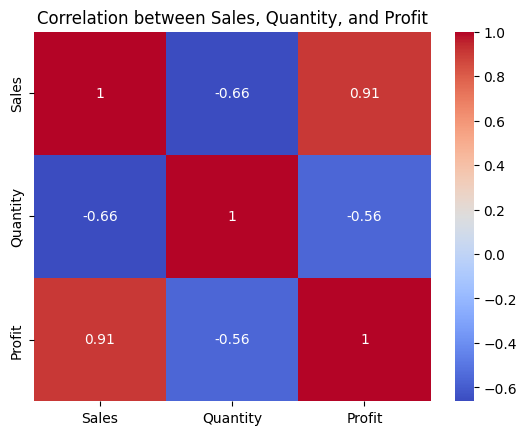

In [7]:
sns.heatmap(df[['Sales', 'Quantity', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Sales, Quantity, and Profit")
plt.show()


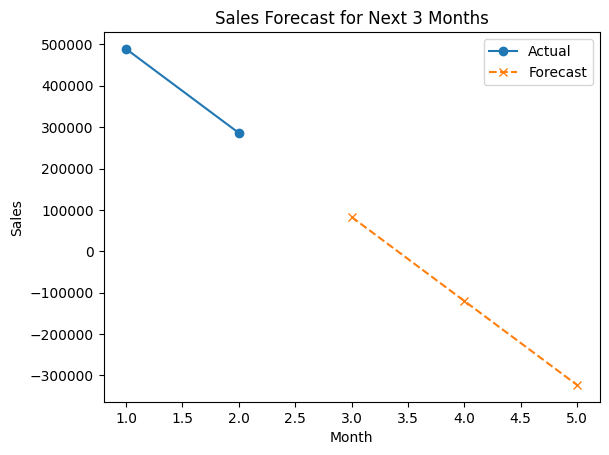

In [8]:
from sklearn.linear_model import LinearRegression

# Prepare monthly sales data
monthly_sales = df.groupby(df['Date'].dt.month)['Sales'].sum().reset_index()
monthly_sales.columns = ['Month', 'Sales']

# Train simple regression model
model = LinearRegression()
X = monthly_sales[['Month']]
y = monthly_sales['Sales']
model.fit(X, y)

# Predict for next 3 months
future_months = pd.DataFrame({'Month': [3, 4, 5]})
future_sales = model.predict(future_months)

# Plot forecast
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', label='Actual')
plt.plot(future_months['Month'], future_sales, marker='x', linestyle='--', label='Forecast')
plt.title('Sales Forecast for Next 3 Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [12]:
import plotly.express as px

# Group by Month
trend = df.groupby('Month')['Sales'].sum().reset_index()

# Convert Month to string (for clean x-axis)
trend['Month'] = trend['Month'].astype(str)

# Plot 1 — Sales by Region and Product
fig = px.bar(df, x='Region', y='Sales', color='Product',
             title='Sales by Region and Product')
fig.show()

# Plot 2 — Monthly Trend
fig2 = px.line(trend, x='Month', y='Sales',
               title='Monthly Sales Trend (Interactive)',
               markers=True)
fig2.show()
